Install and Import

In [8]:
#!pip install numpy pandas matplotlib seaborn

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Numpy Practice

In [13]:
#Create arrays
arr = np.array([1,2,3,4])
print("Array",arr)
print("Shape",arr.shape)

Array [1 2 3 4]
Shape (4,)


In [14]:
#Reshape & Math
matrix = np.arange(1,13).reshape(3,4)
print(matrix)
print("Mean",matrix.mean())
print("Sum of column:",matrix.sum(axis=0))
print("Max element",matrix.max())

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Mean 6.5
Sum of column: [15 18 21 24]
Max element 12


In [15]:
#Indexing and Slicing
print(matrix[0,2]) #element at row 0 and col 2
print(matrix[:,1]) #entire 2nd column
print(matrix[1:,2:]) #sub matrix

3
[ 2  6 10]
[[ 7  8]
 [11 12]]


In [16]:
#Broadcasting example
a = np.array([1,2,3])
b = np.array([10,20,30])
print(a+b)
print(a*b)

[11 22 33]
[10 40 90]


Pandas Practice

In [ ]:
#Load & Inspect
df = pd.read_csv("C:/Users/vicky/Desktop/ASU/God/DS interview preparation/DS Journey/Week1/data/googleplaystore.csv")
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [20]:
#Clean data
df = df.dropna(subset=['Rating'])
df['Rating'] = pd.to_numeric(df['Rating'],errors='coerce')
df = df.drop_duplicates()

In [22]:
#Filtering and Grouping
top_games = df[df['Category'] == 'GAME'].sort_values(by='Rating',ascending=False)
print(top_games[['App','Rating']].head(10))

avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print(avg_rating.head())

                                               App  Rating
10697                                      Mu.F.O.     5.0
5795                              Axe Champs! Wars     5.0
5822   Flippy Axe : Flip The Knife & Axe Simulator     5.0
7466                                        211:CK     5.0
7402                          Trovami se ci riesci     5.0
7698                                     CP Trivia     5.0
10776                             Monster Ride Pro     5.0
6700                              Brick Breaker BR     5.0
9056                   Santa's Monster Shootout DX     5.0
9265                                      EC Mover     5.0
Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.375969
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.347458
Name: Rating, dtype: float64


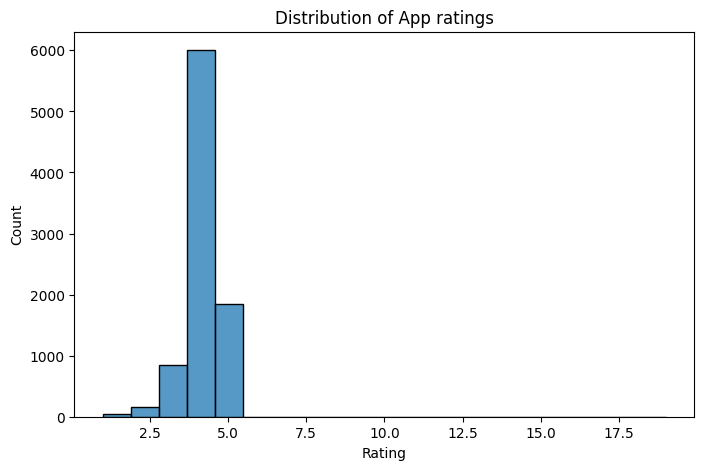

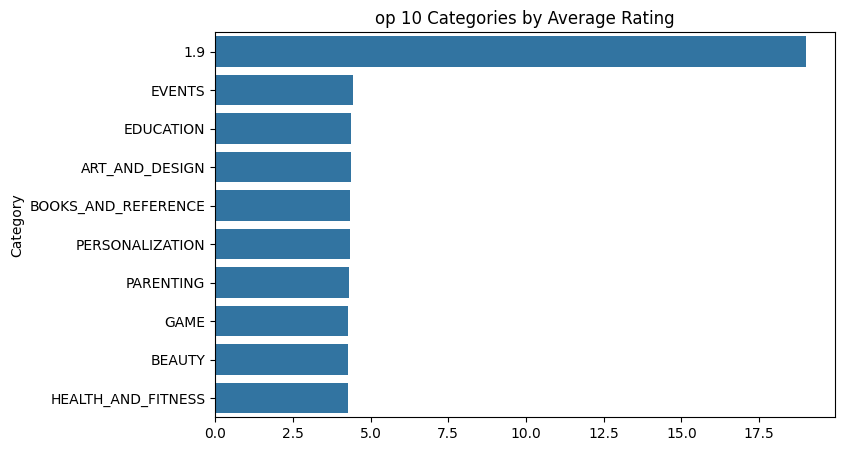

In [ ]:
#Basic Visualization
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'],bins=20,kde=False)  #kde=true - for smooth curve
plt.title("Distribution of App ratings")

plt.figure(figsize=(8,5))
top_10=avg_rating.head(10)
sns.barplot(x=top_10.values,y=top_10.index)
plt.title("Top 10 Categories by Average Rating")
plt.show()